# Twitter Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/robertdaly/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("tweets.csv", encoding='latin1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [4]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [5]:
df.shape

(9093, 3)

In [6]:
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [7]:
sent_df = df.drop('emotion_in_tweet_is_directed_at', axis=1)
sent_df.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [8]:
sent_df.shape

(9093, 2)

In [9]:
sent_df.dropna(inplace=True)

In [10]:
sent_df.drop(index=9092, inplace=True)

In [11]:
sent_df.shape

(9091, 2)

In [12]:
sent_df['sentiment'] = sent_df['is_there_an_emotion_directed_at_a_brand_or_product']
sent_df.drop('is_there_an_emotion_directed_at_a_brand_or_product', axis = 1, inplace=True)

In [13]:
sent_df

,tweet_text,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
...,...,...
9087,"@mention Yup, but I don't have a third app yet...",No emotion toward brand or product
9088,Ipad everywhere. #SXSW {link},Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product


In [14]:
# Based on I don't know not being useful for our predictive model and there only being 156 data points, 
# we decided to drop these rows
sent_df.drop(sent_df.loc[sent_df['sentiment']=="I can't tell"].index, inplace=True)

In [15]:
sent_df.shape

(8935, 2)

## NLP Preprocessing

In [16]:
# Create an intance of the RegexpTokenizer with the variable name `tokenizer`
# The regex pattern should select all words with three or more characters
tokenizer = RegexpTokenizer(pattern=r"(?u)[\w#]{3,}")

# Create a list of stopwords in English
stopwords_list = stopwords.words('english')
# Can add to stopwords_list here
stopwords_list.extend(['#sxsw', 'mention', 'googl', 'link', 'ipad','quot', 'appl', 'iphon', 'store', 'circl'])
stopwords_list.extend(['new','app','austin','like','launch','pop','sxsw', 'line', 'get', 'amp'])

# Create an instance of nltk's PorterStemmer with the variable name `stemmer`
stemmer = PorterStemmer()

In [17]:
# CodeGrade step2
def preprocess_text(text, tokenizer, stopwords_list, stemmer):
    # Standardize case (lowercase the text)
    text = text.lower()
    # Tokenize text using `tokenizer`
    tokenized_text = tokenizer.tokenize(text)
    # Remove stopwords using `stopwords_list`
    filtered_text = [token for token in tokenized_text if token not in stopwords_list]
    # Stem the tokenized text using `stemmer`
    stemmed_text = [stemmer.stem(token) for token in filtered_text]
    # Remove stopword stems using extended `stopwords_list`
    stemmed_filtered_text = [token for token in stemmed_text if token not in stopwords_list]
    # Return the preprocessed text (do not join, just return the list of tokens)
    return stemmed_filtered_text
# preprocess_text("This is an example sentence for preprocessing.", tokenizer, stopwords_list, stemmer)
# preprocess_text(sent_df['tweet_text'][2], tokenizer, stopwords_list, stemmer)
sent_df['preprocessed_text'] = sent_df['tweet_text'].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, stemmer))

In [18]:
sent_df.shape

(8935, 3)

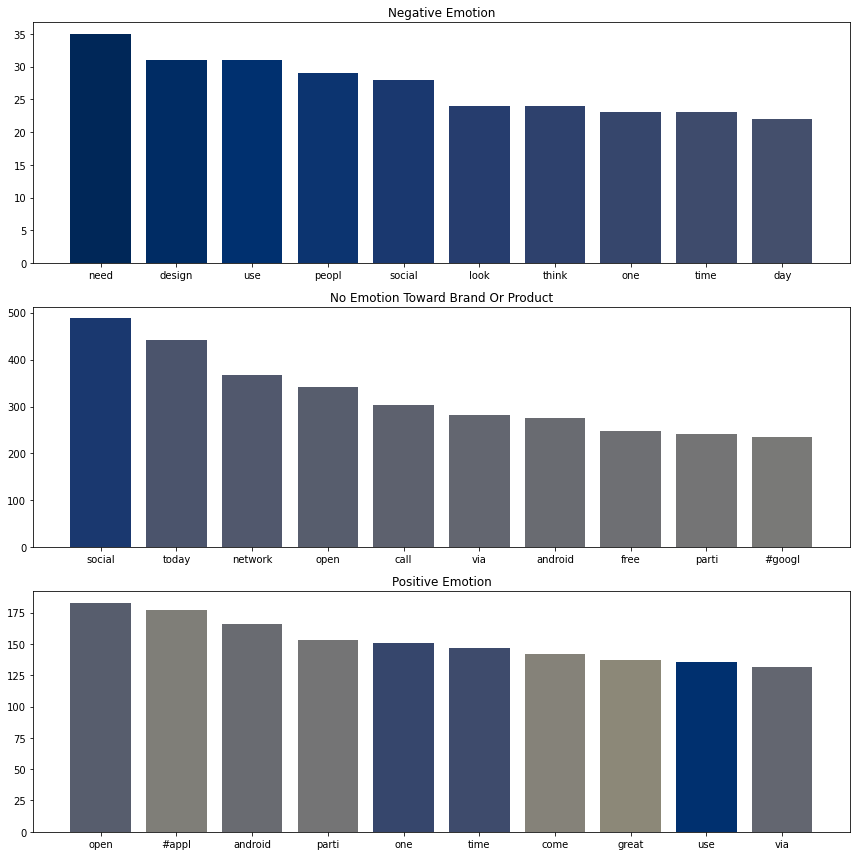

In [19]:
# Run this cell without changes
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure and axes
fig, axes = plt.subplots(nrows=3, figsize=(12, 12))

# Empty dict to hold words that have already been plotted and their colors
plotted_words_and_colors = {}
# Establish color palette to pull from
# (If you get an error message about popping from an empty list, increase this #)
color_palette = sns.color_palette('cividis', n_colors=38)

# Creating a plot for each unique genre
data_by_sent = [y for _, y in sent_df.groupby('sentiment', as_index=False)]
for idx, group in enumerate(data_by_sent):
    # Find top 10 words in this genre
    all_words_in_sent = group.preprocessed_text.explode()
    top_10 = all_words_in_sent.value_counts()[:10]
    
    # Select appropriate colors, reusing colors if words repeat
    colors = []
    for word in top_10.index:
        if word not in plotted_words_and_colors:
            new_color = color_palette.pop(0)
            plotted_words_and_colors[word] = new_color
        colors.append(plotted_words_and_colors[word])
    
    # Select axes, plot data, set title
    ax = axes[idx]
    ax.bar(top_10.index, top_10.values, color=colors)
    ax.set_title(group.iloc[0].sentiment.title())
    
fig.tight_layout()

In [20]:
sent_df.shape

(8935, 3)

## Data Analysis

In [21]:
#Baseline Accuracy Score
baseline_accuracy = sent_df['sentiment'].value_counts(normalize=True)[0]
baseline_accuracy

0.6029099048684947

In [22]:
from sklearn.model_selection import train_test_split

# Convert token lists to strings
sent_df["joined_preprocessed_text"] = sent_df["preprocessed_text"].str.join(" ")

# Create train test split
X = sent_df['joined_preprocessed_text']
y = sent_df['sentiment']
# Explain zoom room 3 here
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=333)

X_train

3157                                  show uzu #tapworthi
7553    seat turkey bowl armadillo kill list sxxpress ...
7186      reason continu surviv exist god #enchant #sxswi
7288    denni crowley competitor think start compet bi...
628                              popup gee wonder traffic
                              ...                        
5593    cameron sinclair spearhead japan disast relief...
7664                   #ipad therefor #appl near send pic
6173               crazi look around realiz last year one
987              nice outsid #appl guess peopl want ipad2
8310                              might well popup #ipad2
Name: joined_preprocessed_text, Length: 6701, dtype: object

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
tree_steps = [('cv', CountVectorizer(stop_words='english')),
         ('tree', DecisionTreeClassifier())]

tree_pipe = Pipeline(tree_steps)
tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('cv', CountVectorizer(stop_words='english')),
                ('tree', DecisionTreeClassifier())])

In [24]:
from sklearn.metrics import accuracy_score, precision_score, ConfusionMatrixDisplay, recall_score, confusion_matrix
y_pred = tree_pipe.predict(X_train)
accuracy_score(y_train, y_pred)

0.9579167288464409

In [25]:
from sklearn.ensemble import RandomForestClassifier
forest_steps = [('cv', CountVectorizer(stop_words='english')),
         ('forest', RandomForestClassifier(random_state=333))]

In [26]:
forest_pipe = Pipeline(forest_steps)
forest_pipe.fit(X_train, y_train)
y_pred = forest_pipe.predict(X_train)

In [27]:
print('train accuracy:', accuracy_score(y_train, y_pred))

train accuracy: 0.9579167288464409


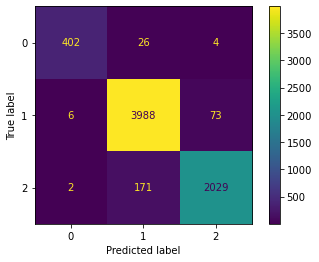

In [28]:
cf = confusion_matrix(y_train, y_pred)
ConfusionMatrixDisplay(cf).plot()

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
params = {'forest__max_depth': [10, 100, None],
         'forest__max_features': [5, 50],
         'forest__n_estimators': [5, 10]}

In [31]:
forest_grid = GridSearchCV(estimator=forest_pipe, param_grid=params, cv=5, scoring='accuracy')
forest_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv',
                                        CountVectorizer(stop_words='english')),
                                       ('forest',
                                        RandomForestClassifier(random_state=333))]),
             param_grid={'forest__max_depth': [10, 100, None],
                         'forest__max_features': [5, 50],
                         'forest__n_estimators': [5, 10]},
             scoring='accuracy')

In [32]:
print(forest_grid.best_estimator_)
print(forest_grid.best_score_)

Pipeline(steps=[('cv', CountVectorizer(stop_words='english')),
                ('forest',
                 RandomForestClassifier(max_features=50, n_estimators=10,
                                        random_state=333))])
0.6672123721437556


### Updated Params

In [33]:
params2 = {'forest__max_depth': [100, 300, None],
         'forest__max_features': [50, 75, 100],
         'forest__n_estimators': [10, 20, 30]}

In [34]:
forest_grid2 = GridSearchCV(estimator=forest_pipe, param_grid=params2, cv=5, scoring='accuracy')
forest_grid2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv',
                                        CountVectorizer(stop_words='english')),
                                       ('forest',
                                        RandomForestClassifier(random_state=333))]),
             param_grid={'forest__max_depth': [100, 300, None],
                         'forest__max_features': [50, 75, 100],
                         'forest__n_estimators': [10, 20, 30]},
             scoring='accuracy')

In [35]:
print(forest_grid2.best_estimator_)
print(forest_grid2.best_score_)

Pipeline(steps=[('cv', CountVectorizer(stop_words='english')),
                ('forest',
                 RandomForestClassifier(max_depth=300, max_features=75,
                                        n_estimators=30, random_state=333))])
0.6842255167117433


### Updated Params

In [36]:
params3 = {'forest__max_depth': [300, 500, None],
         'forest__max_features': [60, 75, 90],
         'forest__n_estimators': [30, 50, 70]}
forest_grid3 = GridSearchCV(estimator=forest_pipe, param_grid=params3, cv=5, scoring='accuracy')
forest_grid3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv',
                                        CountVectorizer(stop_words='english')),
                                       ('forest',
                                        RandomForestClassifier(random_state=333))]),
             param_grid={'forest__max_depth': [300, 500, None],
                         'forest__max_features': [60, 75, 90],
                         'forest__n_estimators': [30, 50, 70]},
             scoring='accuracy')

In [37]:
print(forest_grid3.best_estimator_)
print(forest_grid3.best_score_)

Pipeline(steps=[('cv', CountVectorizer(stop_words='english')),
                ('forest',
                 RandomForestClassifier(max_depth=300, max_features=75,
                                        n_estimators=70, random_state=333))])
0.6848226429374381


## Logistic Classification

In [38]:
from sklearn.linear_model import LogisticRegression
logreg_steps = [('cv', CountVectorizer(stop_words='english')),
         ('logreg', LogisticRegression(random_state=333))]

logreg_pipe = Pipeline(logreg_steps)
logreg_pipe.fit(X_train, y_train)


/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer(stop_words='english')),
                ('logreg', LogisticRegression(random_state=333))])

In [39]:
logreg_pipe.score(X_train, y_train)

0.8789732875690196

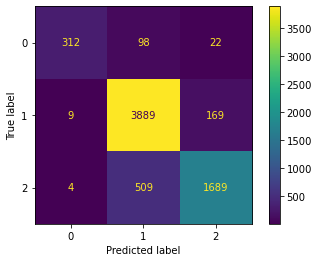

In [40]:
y_pred = logreg_pipe.predict(X_train)
cf = confusion_matrix(y_train, y_pred)
ConfusionMatrixDisplay(cf).plot()

# 0 = Negative Emotion, 1 = No Emotion, 2 = Positive Emotion

In [42]:
logreg_params = {'logreg__class_weight':[None,'balanced', [4, 1, 2]]}
logreg_grid = GridSearchCV(estimator=logreg_pipe, param_grid=logreg_params, cv=5, scoring='accuracy')
logreg_grid.fit(X_train, y_train)

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv',
                                        CountVectorizer(stop_words='english')),
                                       ('logreg',
                                        LogisticRegression(random_state=333))]),
             param_grid={'logreg__class_weight': [None, 'balanced', [4, 1, 2]]},
             scoring='accuracy')

In [43]:
logreg_grid.best_estimator_

Pipeline(steps=[('cv', CountVectorizer(stop_words='english')),
                ('logreg', LogisticRegression(random_state=333))])

In [44]:
logreg_grid.best_score_

0.6781093414359968

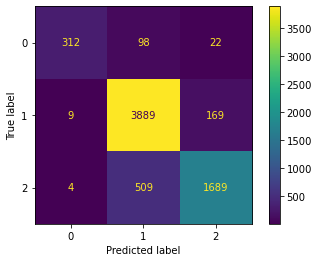

In [45]:
y_pred = logreg_pipe.predict(X_train)
cf = confusion_matrix(y_train, y_pred)
ConfusionMatrixDisplay(cf).plot()

# multinomial naive bayes aka MNB

0.7588419638859871


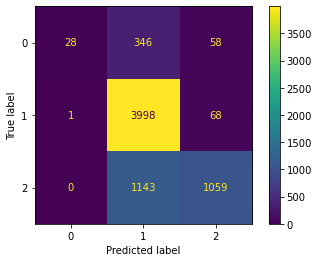

In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,\
HashingVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(X_train, y_train)
X_train_vec = tfidf.transform(X_train)
X_test_vec = tfidf.transform(X_test)

#MNB
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)

y_pred = mnb.predict(X_train_vec)
print(accuracy_score(y_train, y_pred))

cf = confusion_matrix(y_train, y_pred)
ConfusionMatrixDisplay(cf).plot()

In [54]:
estimators = [('forest', RandomForestClassifier(random_state=333)),
 ('logreg', LogisticRegression(random_state=333)),
 ('mnb', MultinomialNB())]

In [67]:
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler

sc = StackingClassifier(estimators=estimators)
scaler = StandardScaler(with_mean=False)


sc_pipe = Pipeline(steps=[('scaler', scaler),
                          ('sc', sc)])

In [68]:
sc_pipe.fit(X_train_vec, y_train)

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('sc',
                 StackingClassifier(estimators=[('forest',
                                                 RandomForestClassifier(random_state=333)),
                                                ('logreg',
                                                 LogisticRegression(random_state=333)),
                                                ('mnb', MultinomialNB())]))])

In [69]:
y_pred = sc_pipe.predict(X_train_vec)

In [70]:
accuracy_score(y_train, y_pred)

0.9597075063423369

In [71]:
sc_pipe.score(X_train_vec, y_train)

0.9597075063423369

0.9597075063423369


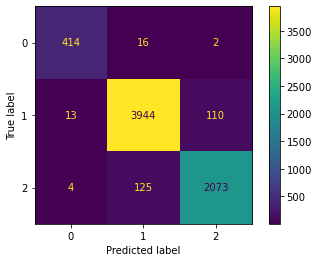

In [72]:
y_pred = sc_pipe.predict(X_train_vec)
print(accuracy_score(y_train, y_pred))

cf = confusion_matrix(y_train, y_pred)
ConfusionMatrixDisplay(cf).plot()

In [73]:
sent_df['sentiment'].value_counts()

No emotion toward brand or product    5387
Positive emotion                      2978
Negative emotion                       570
Name: sentiment, dtype: int64

In [75]:
sc_pipe.fit(X_test_vec, y_test)

/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/robertdaly/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('sc',
                 StackingClassifier(estimators=[('forest',
                                                 RandomForestClassifier(random_state=333)),
                                                ('logreg',
                                                 LogisticRegression(random_state=333)),
                                                ('mnb', MultinomialNB())]))])